In [1]:
#-- Importing nessesary libraries--#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
#-- Importing the dataset--#
df = pd.read_csv('/Users/michaelsegaline/Desktop/Spokane Residential Permits /Residential_Square_Footage_PRR_3.6.2025.csv')

In [3]:
#-- Inspecting the dataset--#
df.head()

,RECORD_ID,RECORD_OPEN_DATE,Combined Code and Description,Sum of Total Square Footage,street,city,state
0,B1000021BLDR,1/4/10 0:00,"101 - Single-Family Houses, Detached",2552,1807 W INDIANA AVE,Spokane,Washington
1,B1000106BLDR,1/6/10 23:36,"101 - Single-Family Houses, Detached",1554,1005 E COLUMBIA AVE,Spokane,Washington
2,B1000144BLDR,1/7/10 0:00,"101 - Single-Family Houses, Detached",3340,2022 W STRATTON AVE,Spokane,Washington
3,B1000428BLDR,1/14/10 0:00,"101 - Single-Family Houses, Detached",2649,916 W STIRLINGVIEW DR,Spokane,Washington
4,B1000514BLDR,1/19/10 0:00,"101 - Single-Family Houses, Detached",1093,1014 E BROAD AVE,Spokane,Washington


In [4]:
#-- Inspecting the shape--#
df.shape

(4968, 7)

# Data Cleaning

In [5]:
#-- Restructering RECORD_OPEN_DATE--#
# Convert the column to datetime format
df['RECORD_OPEN_DATE'] = pd.to_datetime(df['RECORD_OPEN_DATE'])

# Extract Month, Day, and Year into separate columns
df['Month'] = df['RECORD_OPEN_DATE'].dt.month
df['Day'] = df['RECORD_OPEN_DATE'].dt.day
df['Year'] = df['RECORD_OPEN_DATE'].dt.year


In [6]:
#-- Inspecting data types--#
df.dtypes

RECORD_ID                                object
RECORD_OPEN_DATE                 datetime64[ns]
Combined Code and Description            object
Sum of Total Square Footage               int64
street                                   object
city                                     object
state                                    object
Month                                     int64
Day                                       int64
Year                                      int64
dtype: object

In [7]:
df.columns

Index(['RECORD_ID', 'RECORD_OPEN_DATE', 'Combined Code and Description',
       'Sum of Total Square Footage', 'street', 'city', 'state', 'Month',
       'Day', 'Year'],
      dtype='object')

In [8]:
df['street'] = df['street'].astype(str).str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)


In [9]:
df.head()

,RECORD_ID,RECORD_OPEN_DATE,Combined Code and Description,Sum of Total Square Footage,street,city,state,Month,Day,Year
0,B1000021BLDR,2010-01-04 00:00:00,"101 - Single-Family Houses, Detached",2552,1807 w indiana ave,Spokane,Washington,1,4,2010
1,B1000106BLDR,2010-01-06 23:36:00,"101 - Single-Family Houses, Detached",1554,1005 e columbia ave,Spokane,Washington,1,6,2010
2,B1000144BLDR,2010-01-07 00:00:00,"101 - Single-Family Houses, Detached",3340,2022 w stratton ave,Spokane,Washington,1,7,2010
3,B1000428BLDR,2010-01-14 00:00:00,"101 - Single-Family Houses, Detached",2649,916 w stirlingview dr,Spokane,Washington,1,14,2010
4,B1000514BLDR,2010-01-19 00:00:00,"101 - Single-Family Houses, Detached",1093,1014 e broad ave,Spokane,Washington,1,19,2010


# Data Exploration - Exploring one variable at a time

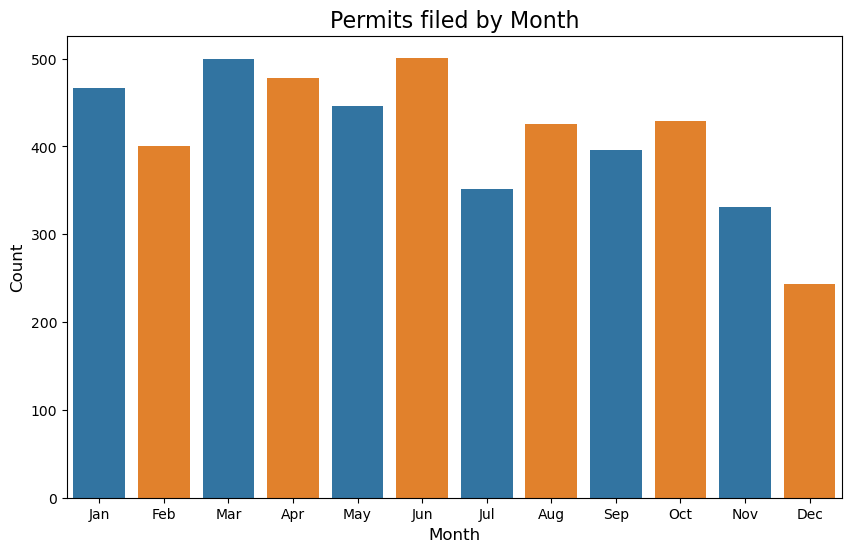

In [10]:
# Count the occurrences per month
month_counts = df['Month'].value_counts().sort_index()

# Create alternating colors
colors = ['#1f77b4', '#ff7f0e'] * 6  # 12 months, alternating

# Plot
plt.figure(figsize=(10,6))
bars = sns.barplot(x=month_counts.index, y=month_counts.values, palette=colors[:len(month_counts)])
plt.title('Permits filed by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

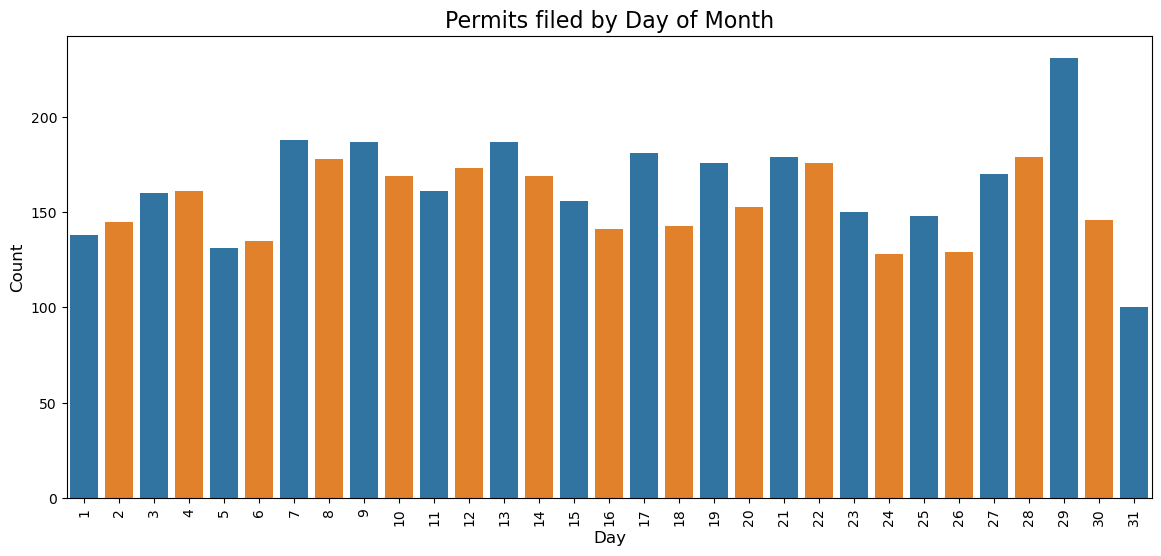

In [11]:
# Count the occurrences per day
day_counts = df['Day'].value_counts().sort_index()

# Create alternating colors (up to 31 days)
colors = ['#1f77b4', '#ff7f0e'] * 16  # 32 items just in case

# Plot
plt.figure(figsize=(14,6))
bars = sns.barplot(x=day_counts.index, y=day_counts.values, palette=colors[:len(day_counts)])
plt.title('Permits filed by Day of Month', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

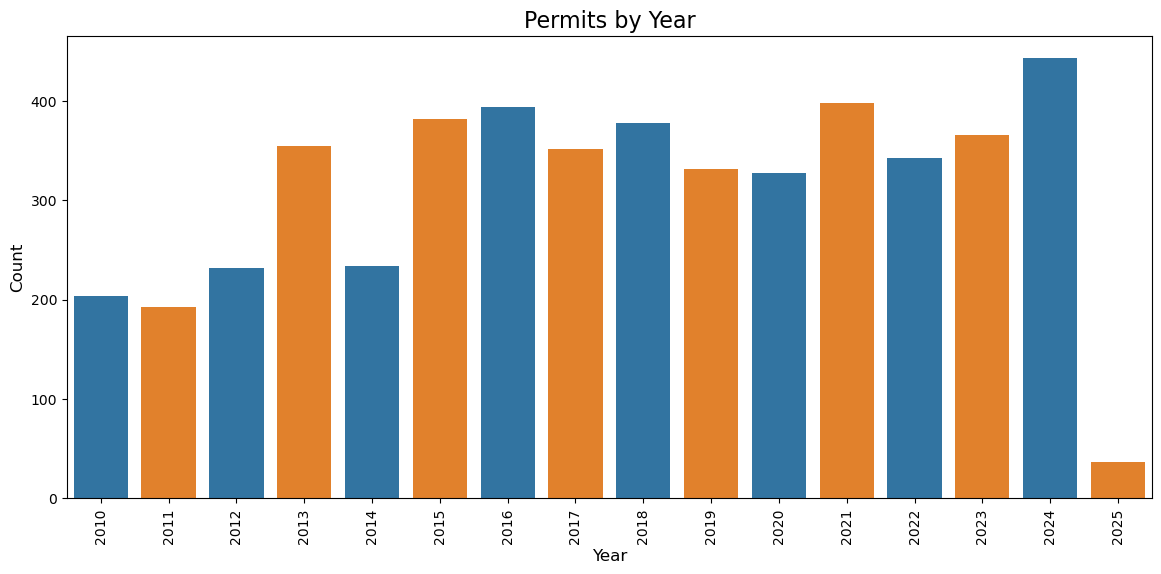

In [12]:
# Count the occurrences per day
year_counts = df['Year'].value_counts().sort_index()

# Create alternating colors (up to 31 days)
colors = ['#1f77b4', '#ff7f0e'] * 16  # 32 items just in case

# Plot
plt.figure(figsize=(14,6))
bars = sns.barplot(x=year_counts.index, y=year_counts.values, palette=colors[:len(day_counts)])
plt.title('Permits by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

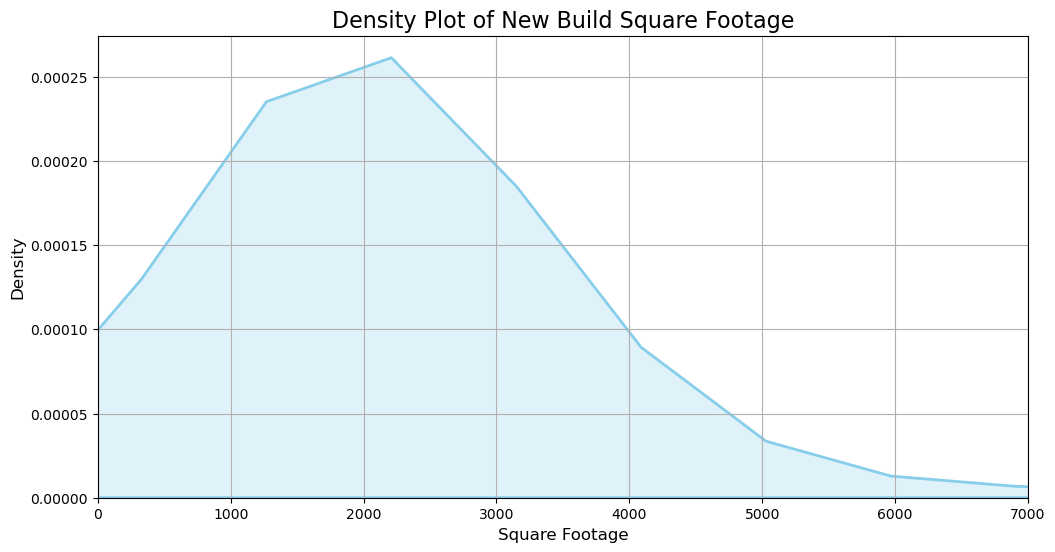

In [13]:
# Density plot
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='Sum of Total Square Footage', fill=True, color='skyblue', linewidth=2)

plt.title('Density Plot of New Build Square Footage', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
# Set x-axis limits to zoom in
plt.xlim(0, 7000)

plt.show()


In [14]:
df['Sum of Total Square Footage'].describe()

count      4968.000000
mean       3217.056965
std        6510.592193
min         128.000000
25%        1545.000000
50%        1979.000000
75%        2661.000000
max      180103.000000
Name: Sum of Total Square Footage, dtype: float64

In [15]:
df['Combined Code and Description'].unique()

array(['101 - Single-Family Houses, Detached',
       '102 - Single-Family Houses, Attached (Townhouse)',
       '103 - Two-Family Bldgs (Duplex)',
       '110 - Mixed Use (Commercial & Residential)',
       '105 - Apartment Bldgs, 5 or More Units',
       '104 - Apartment Bldgs, 3 and 4 Units',
       '433 - Increase # Housing Units'], dtype=object)

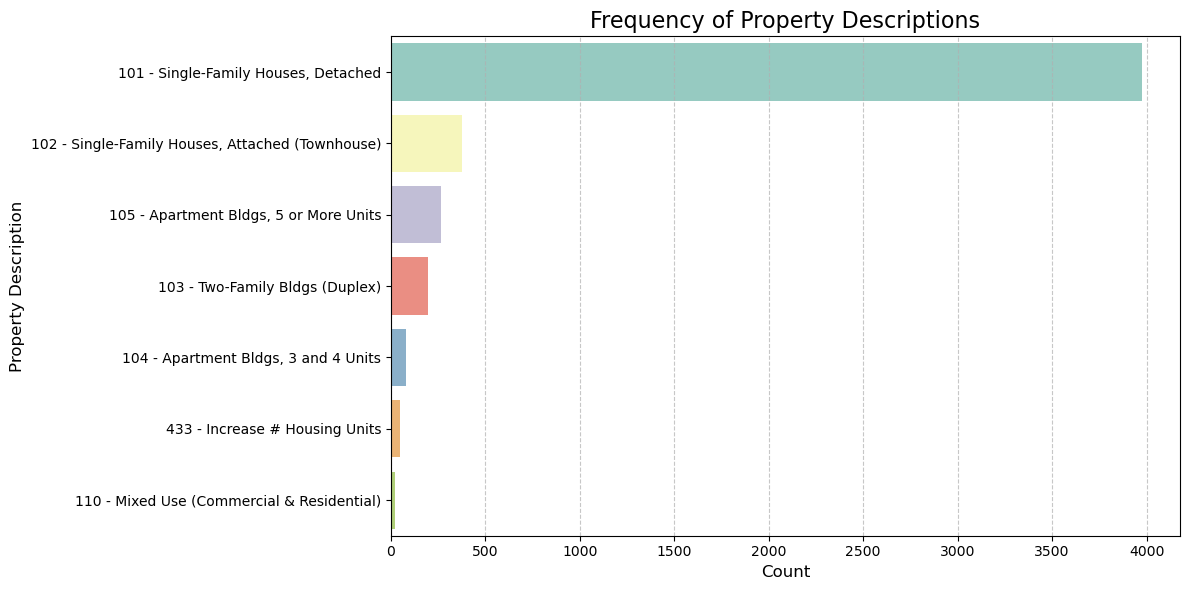

In [16]:
# Count frequency of each description
desc_counts = df['Combined Code and Description'].value_counts()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=desc_counts.values, y=desc_counts.index, palette="Set3")

plt.title('Frequency of Property Descriptions', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Property Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Now using machine learing to attempt to predict the number of permits for the next 5 years

R² Score: -0.08
MSE: 12864.11


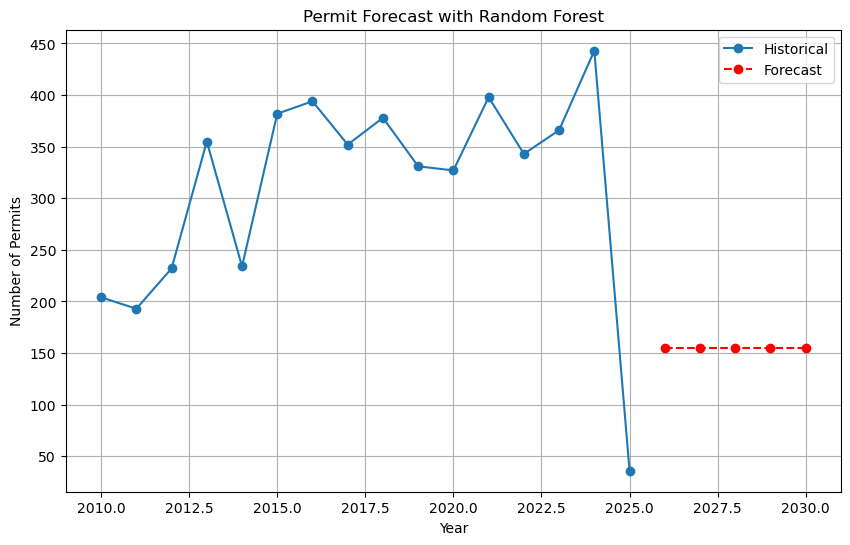

In [18]:

# Example: assuming your dataset is in a DataFrame called df
# and it has columns 'Year' and 'Permit_Count'
df = df.groupby('Year').size().reset_index(name='Permit_Count')  # Aggregate permits per year

# Features and target
X = df[['Year']]
y = df['Permit_Count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

# Forecast the next 5 years
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, df['Year'].max() + 6)})
future_preds = model.predict(future_years)

# Plot historical + predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Permit_Count'], marker='o', label='Historical')
plt.plot(future_years['Year'], future_preds, marker='o', linestyle='--', color='red', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.title('Permit Forecast with Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [19]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# -- Step 1: Prepare Data --
# Ensure it's sorted by year
df = df.sort_values('Year')
df.set_index('Year', inplace=True)

# -- Step 2: Check Stationarity with ADF Test (before differencing) --
adf_result = adfuller(df['Permit_Count'])
print("ADF Statistic (before differencing):", adf_result[0])
print("p-value:", adf_result[1])

# -- Step 3: Differencing the data --
df['diffed'] = df['Permit_Count'].diff().dropna()

# Re-test stationarity
adf_result_diffed = adfuller(df['diffed'].dropna())
print("ADF Statistic (after differencing):", adf_result_diffed[0])
print("p-value:", adf_result_diffed[1])





ADF Statistic (before differencing): -16.91574065577082
p-value: 1.0027509777809948e-29
ADF Statistic (after differencing): -4.047676328769952
p-value: 0.0011804425278863293


In [20]:
from pmdarima import auto_arima

# Step 1: Make sure your data is a clean time series
# NO .diff(), and make sure there's no missing data
y = df['Permit_Count'].dropna()

# Step 2: If you know your data is yearly, set m=1 (no seasonal cycle)
# If it's monthly, set m=12
# NOTE: auto_arima will fail if m is too large for your data length

stepwise_model = auto_arima(
    y,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    seasonal=True,
    m=1,  # Use m=1 for yearly data. If monthly, use m=12
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=197.059, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=199.075, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=232.634, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.161 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                        SARIMAX   Log Likelihood                 -96.529
Date:                Wed, 09 Jul 2025   AIC                            197.059
Time:                        12:20:37   BIC                            198.604
Sample:                             0   HQIC                           197.138
                                 - 16                                         
Covariance

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


                               SARIMAX Results                                
Dep. Variable:           Permit_Count   No. Observations:                   16
Model:                        SARIMAX   Log Likelihood                -115.317
Date:                Wed, 09 Jul 2025   AIC                            232.634
Time:                        12:20:38   BIC                            233.407
Sample:                             0   HQIC                           232.674
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.066e+05   1.09e+05      0.974      0.330   -1.08e+05    3.21e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.48
Prob(Q):                              0.99   Pr

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


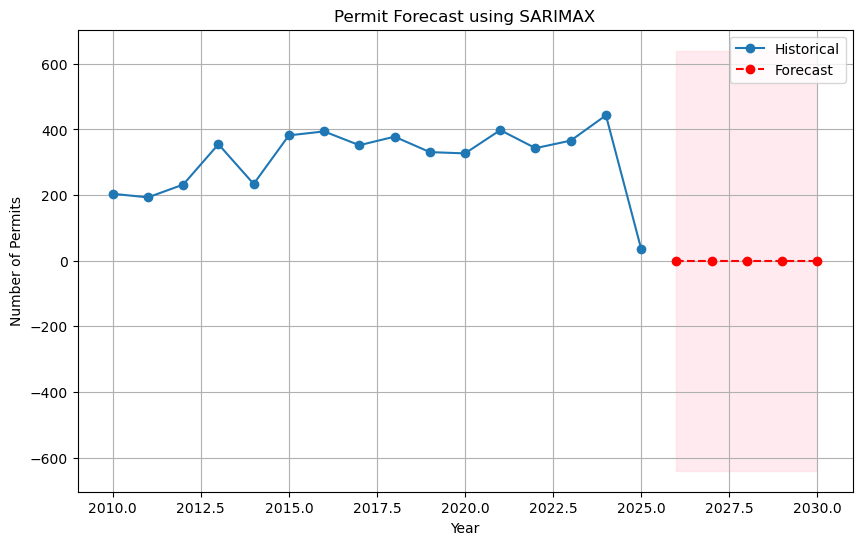

In [21]:
# -- Step 4: Fit SARIMAX Model --
# (p,d,q) x (P,D,Q,s); use grid search or start with something like (1,1,1)(0,0,0,0)
model = SARIMAX(df['Permit_Count'], order=(0, 0, 0), seasonal_order=(0, 0, 0, 0))
result = model.fit(disp=False)
print(result.summary())

# -- Step 5: Forecast Next 5 Years --
n_steps = 5
future_index = pd.Index(range(df.index.max() + 1, df.index.max() + 1 + n_steps), name='Year')
forecast = result.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# -- Step 6: Plot --
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Permit_Count'], label='Historical', marker='o')
plt.plot(future_index, forecast_mean, label='Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(future_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.title('Permit Forecast using SARIMAX')
plt.legend()
plt.grid(True)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Permit_Count   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -389.32
Date:                Wed, 09 Jul 2025   Deviance:                       659.14
Time:                        12:22:33   Pearson chi2:                     485.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6883
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0961      6.217     -3.393      0.0

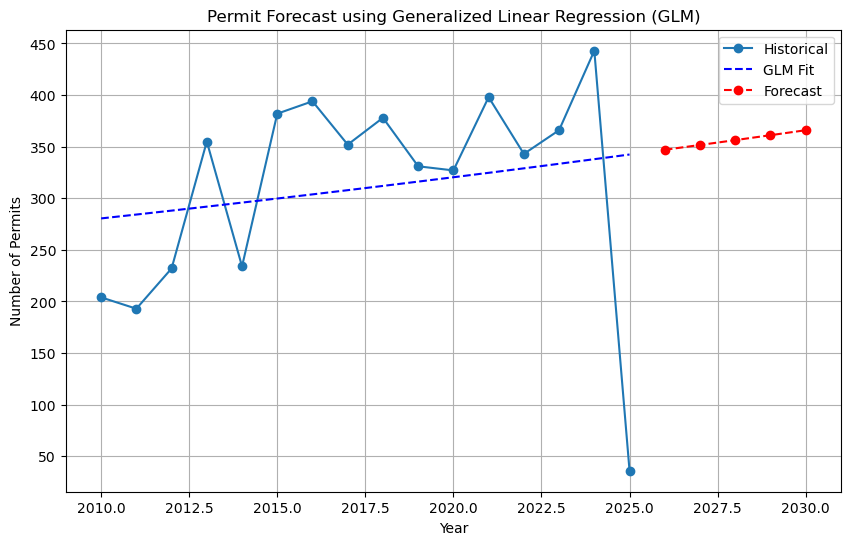

In [24]:
# --- Step 1: Prepare the data ---
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score

df = df.reset_index()  # This brings 'Year' back as a column
X = df[['Year']]
y = df['Permit_Count']



# Add constant term for intercept in GLM
X_const = sm.add_constant(X)

# --- Step 2: Fit the GLM model ---
# We'll use a Poisson family (good for counts), but others are available
glm_model = sm.GLM(y, X_const, family=sm.families.Poisson())
glm_results = glm_model.fit()

# Print model summary
print(glm_results.summary())

# --- Step 3: Predict on historical data ---
y_pred = glm_results.predict(X_const)

# --- Step 4: Forecast future years ---
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, df['Year'].max() + 6)})
future_X = sm.add_constant(future_years)
future_preds = glm_results.predict(future_X)

# --- Step 5: Evaluate (on historical fit) ---
print(f"R² Score (on fit): {r2_score(y, y_pred):.2f}")
print(f"MSE (on fit): {mean_squared_error(y, y_pred):.2f}")

# --- Step 6: Plot ---
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], y, marker='o', label='Historical')
plt.plot(df['Year'], y_pred, linestyle='--', color='blue', label='GLM Fit')
plt.plot(future_years['Year'], future_preds, marker='o', color='red', linestyle='--', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.title('Permit Forecast using Generalized Linear Regression (GLM)')
plt.legend()
plt.grid(True)
plt.show()